In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import sklearn
from sklearn.preprocessing import StandardScaler

#import self-defined utilities
from utils import get_best_classifier, get_train_test_set

import parameters as pm
from .stack import Stacking_Classifier
from random import randint

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, AdaBoostRegressor
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier

# Stacking

# Parameters Tuning

1. Logistic Regression
2. Kernel SVC
3. Random Forest Classifier
4. Extra Trees Classifier
5. AdaBoost Tree
6. XGB Classifier
7. K-Nearest Neighbors

## Two-Level Stack

/Users/jsaon/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


## LogisticRegression(**{'C': 0.125, 'dual': False, 'penalty': 'l1'})
score:  0.831818181818

## SVC(**{'C': 8.0, 'gamma': 0.03125, 'kernel': 'rbf', 'random_state': 1121})
score:  0.825

## DecisionTreeClassifier(**{'min_samples_split': 7, 'max_features': 'sqrt', 'max_depth': 30})
score:  0.826136363636

## RandomForestClassifier(**{'random_state': 1121, 'n_jobs': -1, 'n_estimators': 200, 'min_samples_split': 11, 'max_features': 'log2', 'max_depth': 18})
score:  0.8375

## ExtraTreesClassifier(**{'random_state': 1121, 'n_jobs': -1, 'n_estimators': 200, 'min_samples_split': 14, 'max_features': 'log2', 'max_depth': 16})
score:  0.843181818182

## AdaBoostClassifier(**{'learning_rate': 0.5, 'n_estimators': 20, 'random_state': 1121})
score:  0.827272727273

## XGBClassifier(**{'subsample': 0.70000000000000007, 'seed': 1121, 'reg_lambda': 1.0000000000000001e-05, 'n_estimators': 80, 'min_child_weight': 2.0, 'max_depth': 500, 'learning_rate': 0.125, 'gamma': 2.0, 'colsample_bytree': 0.8000000

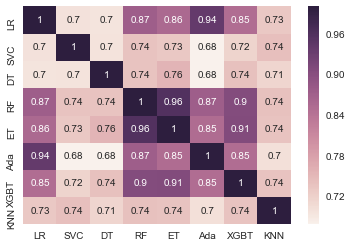

In [2]:
first_level_stack = Stacking_Classifier()
X_train, y_train, X_test = get_train_test_set('../data/preprocessed/final/',
                                              'Survived')

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

model_params = [('LR', LogisticRegression(), pm.logistic_param),
                ('SVC', SVC(), pm.svc_param),
                ('DT', DecisionTreeClassifier(), pm.dt_param),
                ('RF', RandomForestClassifier(), pm.rf_param),
                ('ET', ExtraTreesClassifier(), pm.extra_param),
                ('Ada', AdaBoostClassifier(), pm.ada_param),
                ('XGBT', XGBClassifier(), pm.xgb_param),
                ('KNN', KNeighborsClassifier(), pm.knn_param)]

for name, model, param in model_params:
    base = get_best_classifier(X_train, y_train, model, param, n_iter=500, random_state=100)
    first_level_stack.add_predictionCV(X_train, y_train, X_test, base, name)

S_train, S_test = first_level_stack.get_train_test_set()
first_level_stack.plot_corr_heatmap()

stacker = get_best_classifier(S_train, y_train, XGBClassifier(), pm.xgb_param, n_iter=2000, n_folds=10)
y_pred = stacker.predict(S_test).astype(int)

#S_test2 = np.zeros(S_test.shape)
#for i, (name, model, param) in enumerate(model_params):
#    base = get_best_classifier(S_train, y_train, model, param, n_folds=10, n_iter=500)
#    S_test2[:, i] = base.predict(S_test).reshape(S_test.shape[0])
    
#y_pred = (S_test2 > (S_test.shape[1] / 2)).astype(int)


In [44]:
y_pred = (np.hstack([S_test, S_test2[:, 1:]]).mean(axis=1) > 0.5).astype(int)

          0         1         2         3         4         5         6  \
0  1.000000  0.798317  0.700486  0.798291  0.903270  0.905695  0.866800   
1  0.798317  1.000000  0.687611  0.786486  0.829603  0.794710  0.771906   
2  0.700486  0.687611  1.000000  0.736829  0.715954  0.706398  0.707445   
3  0.798291  0.786486  0.736829  1.000000  0.864069  0.804446  0.851041   
4  0.903270  0.829603  0.715954  0.864069  1.000000  0.909913  0.879016   
5  0.905695  0.794710  0.706398  0.804446  0.909913  1.000000  0.883021   
6  0.866800  0.771906  0.707445  0.851041  0.879016  0.883021  1.000000   
7  0.768899  0.846075  0.702069  0.875677  0.814585  0.760226  0.791452   

          7  
0  0.768899  
1  0.846075  
2  0.702069  
3  0.875677  
4  0.814585  
5  0.760226  
6  0.791452  
7  1.000000  
## XGBClassifier(**{'subsample': 0.90000000000000002, 'seed': 1121, 'reg_lambda': 1.0000000000000001e-05, 'n_estimators': 260, 'min_child_weight': 32.0, 'max_depth': 500, 'learning_rate': 0.5, 'gamm

/Users/jsaon/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


          0         1         2         3         4         5         6  \
0  1.000000  0.726154  0.713680  0.866866  0.866524  0.922449  0.886436   
1  0.726154  1.000000  0.707260  0.790643  0.796848  0.697244  0.760793   
2  0.713680  0.707260  1.000000  0.812373  0.793562  0.734012  0.772225   
3  0.866866  0.790643  0.812373  1.000000  0.960029  0.879086  0.919603   
4  0.866524  0.796848  0.793562  0.960029  1.000000  0.864273  0.889991   
5  0.922449  0.697244  0.734012  0.879086  0.864273  1.000000  0.893967   
6  0.886436  0.760793  0.772225  0.919603  0.889991  0.893967  1.000000   
7  0.790375  0.798391  0.764343  0.891869  0.877418  0.802077  0.846841   

          7  
0  0.790375  
1  0.798391  
2  0.764343  
3  0.891869  
4  0.877418  
5  0.802077  
6  0.846841  
7  1.000000  
## XGBClassifier(**{'subsample': 0.60000000000000009, 'seed': 1121, 'reg_lambda': 0.10000000000000001, 'n_estimators': 220, 'min_child_weight': 2.0, 'max_depth': 500, 'learning_rate': 0.5, 'gamma': 

/Users/jsaon/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


          0         1         2         3         4         5         6  \
0  1.000000  0.722447  0.740078  0.888126  0.876079  0.939308  0.863656   
1  0.722447  1.000000  0.688424  0.750321  0.771854  0.690160  0.744200   
2  0.740078  0.688424  1.000000  0.789296  0.790951  0.748768  0.788596   
3  0.888126  0.750321  0.789296  1.000000  0.972458  0.908306  0.919763   
4  0.876079  0.771854  0.790951  0.972458  1.000000  0.885858  0.916886   
5  0.939308  0.690160  0.748768  0.908306  0.885858  1.000000  0.863429   
6  0.863656  0.744200  0.788596  0.919763  0.916886  0.863429  1.000000   
7  0.759769  0.819155  0.681474  0.753248  0.769769  0.718100  0.767457   

          7  
0  0.759769  
1  0.819155  
2  0.681474  
3  0.753248  
4  0.769769  
5  0.718100  
6  0.767457  
7  1.000000  
## XGBClassifier(**{'subsample': 1.0, 'seed': 1121, 'reg_lambda': 0.0001, 'n_estimators': 120, 'min_child_weight': 8.0, 'max_depth': 500, 'learning_rate': 0.00390625, 'gamma': 4.0, 'colsample_bytree

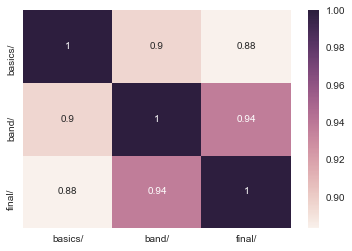

In [34]:

second_level_stack = Stacking_Classifier()
file_dirs = ['basics/',
             'band/',
             'final/']

model_params = [('LR', LogisticRegression(), pm.logistic_param),
                ('SVC', SVC(), pm.svc_param),
                ('DT', DecisionTreeClassifier(), pm.dt_param),
                ('RF', RandomForestClassifier(), pm.rf_param),
                ('ET', ExtraTreesClassifier(), pm.extra_param),
                ('Ada', AdaBoostClassifier(), pm.ada_param),
                ('XGBT', XGBClassifier(), pm.xgb_param),
                ('KNN', KNeighborsClassifier(), pm.knn_param)]

seed1 = 100
seed2 = 300
#S_test2 = np.zeros(418)
for file_dir in file_dirs:
    first_level_stack = Stacking_Classifier()
    X_train, y_train, X_test = get_train_test_set('../data/preprocessed/' + file_dir,
                                                  'Survived')

    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    for name, model, param in model_params:
        base = get_best_classifier(X_train, y_train, model, param, verbose=False, n_iter=500, random_state=seed1)
        first_level_stack.add_predictionCV(X_train, y_train, X_test, base, name, random_state=seed1)


    S_train, S_test = first_level_stack.get_train_test_set()
    print(pd.DataFrame(S_train).corr())
    
    stacker = get_best_classifier(S_train, y_train, XGBClassifier(), pm.xgb_param, random_state=seed2)
    second_level_stack.add_predictionCV(S_train, y_train, S_test, stacker, file_dir, random_state=seed2)
    

second_level_stack.plot_corr_heatmap()
S_train2, S_test2 = second_level_stack.get_train_test_set()
stacker = get_best_classifier(S_train2, y_train, XGBClassifier(), pm.xgb_param, n_iter=2000)
y_pred = stacker.predict(S_test2).astype(int)

In [38]:

second_level_stack = Stacking_Classifier()
file_dirs = ['basics/',
             'band/',
             'final/']

model_params = [('LR', LogisticRegression(), pm.logistic_param),
                ('SVC', SVC(), pm.svc_param),
                ('DT', DecisionTreeClassifier(), pm.dt_param),
                ('RF', RandomForestClassifier(), pm.rf_param),
                ('ET', ExtraTreesClassifier(), pm.extra_param),
                ('Ada', AdaBoostClassifier(), pm.ada_param),
                ('XGBT', XGBClassifier(), pm.xgb_param),
                ('KNN', KNeighborsClassifier(), pm.knn_param)]

seed1 = 100
seed2 = 300
S_test2 = np.zeros(418)
for file_dir in file_dirs:
    first_level_stack = Stacking_Classifier()
    X_train, y_train, X_test = get_train_test_set('../data/preprocessed/' + file_dir,
                                                  'Survived')

    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    for name, model, param in model_params:
        base = get_best_classifier(X_train, y_train, model, param, verbose=False, n_iter=200, random_state=seed1)
        first_level_stack.add_predictionCV(X_train, y_train, X_test, base, name, random_state=seed1)


    S_train, S_test = first_level_stack.get_train_test_set()
    print(pd.DataFrame(S_train).corr())
    
    stacker = get_best_classifier(S_train, y_train, XGBClassifier(), pm.xgb_param, n_iter= 500, random_state=seed2)
    S_test2 = S_test2 + stacker.predict(S_test)

y_pred = (S_test2 > 1.5).astype(int)
y_pred

          0         1         2         3         4         5         6  \
0  1.000000  0.874526  0.778778  0.805639  0.910619  0.915430  0.847670   
1  0.874526  1.000000  0.750784  0.770273  0.893512  0.876289  0.811712   
2  0.778778  0.750784  1.000000  0.807006  0.786108  0.760443  0.813219   
3  0.805639  0.770273  0.807006  1.000000  0.858921  0.812258  0.912536   
4  0.910619  0.893512  0.786108  0.858921  1.000000  0.932174  0.891007   
5  0.915430  0.876289  0.760443  0.812258  0.932174  1.000000  0.864147   
6  0.847670  0.811712  0.813219  0.912536  0.891007  0.864147  1.000000   
7  0.766421  0.785259  0.766824  0.845614  0.809367  0.792614  0.817407   

          7  
0  0.766421  
1  0.785259  
2  0.766824  
3  0.845614  
4  0.809367  
5  0.792614  
6  0.817407  
7  1.000000  
## XGBClassifier(**{'subsample': 1.0, 'seed': 1121, 'reg_lambda': 0.10000000000000001, 'n_estimators': 40, 'min_child_weight': 32.0, 'max_depth': 500, 'learning_rate': 0.5, 'gamma': 32.0, 'colsample

/Users/jsaon/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


          0         1         2         3         4         5         6  \
0  1.000000  0.726154  0.768208  0.854470  0.879691  0.922449  0.839472   
1  0.726154  1.000000  0.739333  0.798391  0.777123  0.697244  0.729838   
2  0.768208  0.739333  1.000000  0.815916  0.820026  0.779423  0.762299   
3  0.854470  0.798391  0.815916  1.000000  0.949618  0.861691  0.880306   
4  0.879691  0.777123  0.820026  0.949618  1.000000  0.896682  0.870110   
5  0.922449  0.697244  0.779423  0.861691  0.896682  1.000000  0.837237   
6  0.839472  0.729838  0.762299  0.880306  0.870110  0.837237  1.000000   
7  0.790375  0.798391  0.775551  0.894463  0.878922  0.802077  0.820360   

          7  
0  0.790375  
1  0.798391  
2  0.775551  
3  0.894463  
4  0.878922  
5  0.802077  
6  0.820360  
7  1.000000  
## XGBClassifier(**{'subsample': 0.80000000000000004, 'seed': 1121, 'reg_lambda': 0.01, 'n_estimators': 100, 'min_child_weight': 16.0, 'max_depth': 500, 'learning_rate': 0.5, 'gamma': 8.0, 'colsampl

/Users/jsaon/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


          0         1         2         3         4         5         6  \
0  1.000000  0.700164  0.665009  0.888237  0.863656  0.946614  0.831634   
1  0.700164  1.000000  0.714059  0.717407  0.737110  0.665854  0.713582   
2  0.665009  0.714059  1.000000  0.706241  0.715785  0.675091  0.702164   
3  0.888237  0.717407  0.706241  1.000000  0.969859  0.900963  0.886733   
4  0.863656  0.737110  0.715785  0.969859  1.000000  0.871080  0.896597   
5  0.946614  0.665854  0.675091  0.900963  0.871080  1.000000  0.833611   
6  0.831634  0.713582  0.702164  0.886733  0.896597  0.833611  1.000000   
7  0.759780  0.811655  0.718634  0.762577  0.772225  0.720719  0.769018   

          7  
0  0.759780  
1  0.811655  
2  0.718634  
3  0.762577  
4  0.772225  
5  0.720719  
6  0.769018  
7  1.000000  
## XGBClassifier(**{'subsample': 0.60000000000000009, 'seed': 1121, 'reg_lambda': 0.01, 'n_estimators': 100, 'min_child_weight': 8.0, 'max_depth': 500, 'learning_rate': 0.125, 'gamma': 2.0, 'colsamp

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0,

In [3]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [39]:
print(pd.DataFrame(S_train2).corr())

          0         1         2
0  1.000000  0.895837  0.883371
1  0.895837  1.000000  0.937134
2  0.883371  0.937134  1.000000


In [4]:
test_df = pd.read_csv('../data/input/test.csv')
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'],
                           'Survived': y_pred})
submission.to_csv('../output/submission29.csv', index=False)